# Stock Screener

### This notebook is intended to help get a centralized view of important statistics for stocks of companies.

### 1. Imports
We begin with all the imports we will need for analysis.

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import math
import json

### 2. Getting tickers for gold stocks.

In [2]:
#Where tickers comes from
goldStocksUrl = "http://www.miningfeeds.com/gold-mining-report-all-countries"

def goldStockParser(url, tickerColumn, stockTypes):
    """Goes to url above and pulls the tickers of each 
       gold mining company, dumps them in a pickle file 
       and returns the tickers as a list."""
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "lxml")
    table = soup.find("table")
    tickers = []
    for row in table.findAll("tr")[1:]:
        ticker = row.findAll("td")[tickerColumn].text
        #Randgold real ticker.
        if (ticker == "GOLD.L"):
            ticker = "GOLD"
        tickers.append(ticker)

    with open(stockTypes + ".pickle", "wb") as file:
        pickle.dump(tickers, file)

    return tickers

def pickleLoader(stockTypes):
    """Loads tickers from a pickle file and returns them as a list."""
    with open(stockTypes + ".pickle", "rb") as file:
        return pickle.load(file)

#Look in cache if False, go to website if true.    
reloadGoldTickers = False

badDataStocks = ["GLF.AX", "AZ.TO", "LEX.TO", "RN.TO", "P.TO", "CSQ.V",
                 "DNA.TO", "PRH.AX", "GBU.TO", "RPM.V", "ARZ.TO", "ABU.AX",
                 "BAA.TO",]
goldStockTickers = []

if reloadGoldTickers:
    goldStockTickers = goldStockParser(goldStocksUrl, 2, "goldStocks")
else:
    goldStockTickers = pickleLoader("goldStocks")

#Remove stocks with bad data.    
for ticker in badDataStocks:
    goldStockTickers.remove(ticker)
    
print(goldStockTickers)

['NEM', 'ABX', 'FNV.TO', 'NCM.AX', 'GG', 'AEM', 'KGC', 'RGLD', 'RRS.L', 'FRES.L', 'AGG.AX', 'EVN.AX', 'GFI', 'BTO.TO', 'YRI.TO', 'IMG.TO', 'AGI.TO', 'CEY.L', 'PVG', 'DGC.TO', 'NGD.TO', 'RRL.AX', 'OGC.TO', 'SBM.AX', 'CG.TO', 'EDV.TO', 'NG.TO', 'ELD.TO', 'SAR.AX', 'SMF.TO', 'HMY', 'TXG.TO', 'CGG.TO', 'NSU.TO', 'GUY.TO', 'RSG.AX', 'SEA.TO', 'MUX', 'RIC', 'PG.TO', 'OSK.TO', 'ALIAF', 'CNL.TO', 'GOR.AX', 'POG.L', 'GSS', 'PAF.L', 'AR.TO', 'PRU.AX', 'TBR.AX', 'BGM.V', 'TGZ.TO', 'SBB.TO', 'GORO', 'WDO.TO', 'HRT.TO', 'WAF.AX', 'VIT.V', 'AOT.V', 'NGQ.TO', 'BDR.AX', 'HUM.L', 'RMS.AX', 'SLR.AX', 'BSX.TO', 'GCY.AX', 'KOR.TO', 'MOZ.TO', 'BTR.V', 'HRR.AX', 'PRB.V', 'ALK.AX', 'HAS.AX', 'R.TO', 'JAG.TO', 'MAX.TO', 'TNG.AX', 'PEN.AX', 'CAL.TO', 'TLG.AX', 'RUP.V', 'GGP.L', 'AAL.V', 'KCN.AX', 'ITH.TO', 'MML.AX', 'GGG.AX', 'VGZ', 'ARU.V', 'RMX.TO', 'QBL.AX', 'TSG.L', 'ATC.V', 'KGL.AX', 'TML.TO', 'IMA.AX', 'DRM.AX', 'RED.AX', 'MTO.V', 'DGR.AX', 'MRC.AX', 'DNG.TO', 'LIO.V', 'GME.AX', 'LEG.AX', 'BAR.TO', 'ATM.

### 3. Specify formatting details of data.

Specify rows of data that are wanted from yahoo.

Specify rows of data that have letters in their numbers for conversion.

Specify rows of data that have percentage signs in their numbers for conversion.

In [10]:
wantedRows = {0  : "marketCap", 
              1  : "enterpriseValue",
              2  : "trailingPe",
              3  : "forwardPe",
              4  : "5YrPeg",
              5  : "priceSales",
              6  : "priceBook",
              7  : "evSales",
              8  : "evEBITDA",
              11 : "profitMargin",
              12 : "operatingMargin",
              13 : "returnOnAssets",
              14 : "returnOnEquity",
              15 : "revenue",
              16 : "revenuePerShare",
              17 : "quarterlyRevenueGrowth",
              18 : "grossProfit",
              19 : "EBITDA",
              20 : "netIncomeForCommon",
              21 : "Diluted EPS",
              22 : "quarterlyEarningsGrowth",
              23 : "totalCash",
              24 : "cashPerShare",
              25 : "totalDebt",
              26 : "debtEquity",
              27 : "currentRatio",
              28 : "bookValuePerShare", 
              29 : "operatingCashFlow",
              30 : "leveredFreeCashFlow",
              31 : "beta3YrMonthly",
              32 : "52WeekChange",
              33 : "spy52WeekChange",
              34 : "52WeekHigh",
              35 : "52WeekLow",
              36 : "50dayMvAvg",
              37 : "200dayMvAvg",
              38 : "avg3MonthVol",
              39 : "avg10DayVol",
              40 : "sharesOutstanding",
              41 : "sharesFloating",
              42 : "heldByInsiders",
              43 : "heldByInstitutions",
              44 : "sharesShort1MonthPrior",
              45 : "shortRatio",
              46 : "shortToFloat",
              47 : "shortToOutstanding",
              48 : "sharesShort2MonthsPrior",
              49 : "forwardDividendRate",
              50 : "forwardDividendYield",
              51 : "trailingDividendRate",
              52 : "trailingDividendYield",
              53 : "5yrAvgDividendYield",
              54 : "payoutRatio",
              55 : "dividendDate",
              56 : "exDividendDate",
              57 : "lastSplitFactorNewPerOld",
              58 : "lastSplitDate",
              60 : "currentPrice",}

letterNumbers = ["marketCap", 
                 "enterpriseValue",
                 "revenue",
                 "grossProfit",
                 "EBITDA",
                 "netIncomeForCommon",
                 "totalCash",
                 "totalDebt",
                 "operatingCashFlow",
                 "leveredFreeCashFlow",
                 "avg3MonthVol",
                 "avg10DayVol",
                 "sharesOutstanding",
                 "sharesFloating",
                 "sharesShort1MonthPrior",
                 "sharesShort2MonthsPrior",]

percentageNumbers = ["profitMargin",
                     "operatingMargin",
                     "returnOnAssets",
                     "returnOnEquity",
                     "quarterlyRevenueGrowth",
                     "quarterlyEarningsGrowth",
                     "52WeekChange",
                     "spy52WeekChange",
                     "heldByInsiders",
                     "heldByInstitutions",
                     "shortToFloat",
                     "shortToOutstanding",
                     "forwardDividendYield",
                     "trailingDividendYield",
                     "payoutRatio",]


### 4. Retreive data from yahoo and cache it.
We need to look up data from yahoo and store it in a csv locally for caching purposes. Also want to format well. ie remove redundant columns and rename.

In [11]:
baseurl = "https://uk.finance.yahoo.com/quote/"

def getDataFromYahoo(stockTypes, tickers, baseurl = baseurl):
    """Checks if data has been stored in csv, if not
       looks to yahoo. Then returns as map of tickers to dataframe."""
    #Create directory for data of tickers.
    dataDir = "./%s_data" % stockTypes
    createDirIfItDoesntExist(dataDir)
    
    frames = {}
    
    for ticker in tickers:
        dataFile = "./%s/%s.csv" % (dataDir, ticker)
        data = None
        if not os.path.exists(dataFile):
            exists, data = saveDataAndReturnSeries(dataFile, ticker)
            if not exists:
                continue
        else:
            print("Already have %s" % ticker)
            data = pd.Series.from_csv(dataFile, index_col=0)
        frames[ticker] = data
    return pd.DataFrame(frames)

def createDirIfItDoesntExist(dataDir):
    """If directory with name dataDir does not exist, create it."""
    if not os.path.exists(dataDir):
        os.makedirs(dataDir)
        
def reformatData(data):
    """Reformat data with better names and remove redundancies"""
    dataDict = {}
    for index in wantedRows:
        series = data.loc[index]
        key = wantedRows[index]
        value = series.get(1)
        dataDict[key] = value
    return pd.Series(dataDict)

def getCurrency(html):
    """Gets the string of the currency stock is priced in."""
    soup = bs(html)
    results = soup.findAll("span", {"data-reactid" : "9"})
    i = 0
    for result in results:
        if i == 1:
            line = result.text
        i += 1
    return line[-3:] 
        
def saveDataAndReturnSeries(dataFile, ticker):
    """Gets data from yahoo and dumps in csv file before 
       returning data as pandas series. Returns true, series if
       there is data, false, none if not."""
    print("Requesting: %s" % ticker)

    #Go to summary page and scrape open.
    priceData = requests.get(baseurl + "%s?p=%s" % (ticker, ticker))       
    summaryFrames = pd.read_html(priceData.text)
    summaryFrame = pd.concat(summaryFrames, ignore_index=True)
    priceFrame = summaryFrame.loc[1:1]
    
    #Scrape currency from summary page.
    currency = getCurrency(priceData.text)
    
    #Go to stats page and scrape stats.
    data = requests.get(baseurl + "%s/key-statistics?p=%s" % (ticker, ticker))
    frames = pd.read_html(data.text)
    if len(frames) < 3:
        print("No data for: %s" % ticker)
        return False , None

    #Join stats and price
    frames.append(priceFrame)
    frame = pd.concat(frames, ignore_index=True)

    #Reformat
    reformattedSeries = reformatData(frame)
    reformattedSeries["currency"] = currency.upper()
    
    #Save data
    reformattedSeries.to_csv(dataFile)
    return True, reformattedSeries

tickerData = getDataFromYahoo("gold_stocks", goldStockTickers)

#Convert Nan values to 0.
tickerData[pd.isnull(tickerData)] = "0"
print(tickerData.head())

Already have NEM
Already have ABX
Already have FNV.TO
Already have NCM.AX
Already have GG
Already have AEM
Already have KGC
Already have RGLD
Already have RRS.L
Already have FRES.L
Already have AGG.AX
Already have EVN.AX
Already have GFI
Already have BTO.TO
Already have YRI.TO
Already have IMG.TO
Already have AGI.TO
Already have CEY.L
Already have PVG
Already have DGC.TO
Already have NGD.TO
Already have RRL.AX
Already have OGC.TO
Already have SBM.AX
Already have CG.TO
Already have EDV.TO
Already have NG.TO
Already have ELD.TO
Already have SAR.AX
Already have SMF.TO
Already have HMY
Already have TXG.TO
Already have CGG.TO
Already have NSU.TO
Already have GUY.TO
Already have RSG.AX
Already have SEA.TO
Already have MUX
Already have RIC
Already have PG.TO
Already have OSK.TO
Already have ALIAF
Already have CNL.TO
Already have GOR.AX
Already have POG.L
Already have GSS
Already have PAF.L
Already have AR.TO
Already have PRU.AX
Already have TBR.AX
Already have BGM.V
Already have TGZ.TO
Alread

### 5. Reformat text rows into numbers for numerical analysis.

Use maps defined earlier to create masks and apply conversion functions.

In [12]:
def convertLetter(string):
    if string == "0":
        return 0
    string = string.replace(",", "")
    number = string[0:-1]
    letter = string[-1]
    if letter == "B":
        return float(number) * 1000
    if letter == "M":
        return float(number) 
    if letter == "k":
        return float(number) / 100
    
def convertPercent(string):
    if string == "0":
        return 0
    string = string.replace(",", "")
    number = string[0:-1]
    return float(number)

# Create mask for letter numbers and convert them.
letterMask = tickerData.index.isin(letterNumbers)
tickerData[letterMask] = tickerData[letterMask].applymap(convertLetter)

# Create mask for percentage numbers and convert them.
percentageMask = tickerData.index.isin(percentageNumbers)
tickerData[percentageMask] = tickerData[percentageMask].applymap(convertPercent)

print(tickerData)

                                  NEM          ABX       FNV.TO       NCM.AX  \
marketCap                       17230        15030        17150        15700   
enterpriseValue                 19380        21110        15610        16950   
trailingPe                          0            0        80.63        78.09   
forwardPe                       23.78        28.33        71.32        22.73   
5YrPeg                           6.64        -1.15         8.11         1.21   
priceSales                       2.42         1.99        25.59         4.41   
priceBook                        1.63         1.67         3.61         2.12   
evSales                          2.73         2.79        23.30         4.76   
evEBITDA                         7.17         6.33        30.06        11.00   
profitMargin                    -2.63        -8.75        31.91         5.67   
operatingMargin                 16.01        28.53        40.19        13.14   
returnOnAssets                   3.44   

### 6. Now normalize for currencies.

Companies stock is denominated in different currencies, we must normalise for good aggregations.

Use api to look up fx rates.

In [13]:
fxurl = "http://data.fixer.io/api/latest?access_key=d76b170eea08be26f92b73f07d9a7cad&symbols=USD,AUD,CAD,GBP,EUR"
r = requests.get(fxurl)
r = json.loads(r.text)
rates = r["rates"]
usdFactor = rates["USD"]
for c in rates:
    rates[c] = 1 / (rates[c] / usdFactor)
print(rates)    

{'USD': 1.0, 'AUD': 0.7382809530523416, 'CAD': 0.7594971736571613, 'GBP': 1.2800078403276716, 'EUR': 1.136286}


Now we must specify which companies, ie columns, are not denominated in dollars.

In [14]:
nonDollarDenominated = (tickerData.loc["currency"] != "USD").values

Now we specify which rows need to be converted.

In [15]:
currencyConcerned = ["marketCap", 
                     "enterpriseValue",
                     "revenue",
                     "grossProfit",
                     "EBITDA",
                     "netIncomeForCommon",
                     "totalCash",
                     "totalDebt",
                     "operatingCashFlow",
                     "leveredFreeCashFlow",
                     "52WeekHigh",
                     "52WeekLow",
                     "50dayMvAvg",
                     "200dayMvAvg",]


def convertCurrency(amount, factor):
    return round(float(amount) * factor, 2)

currencyMask = tickerData.index.isin(currencyConcerned)
nonDollarData = tickerData[currencyMask].loc[: ,nonDollarDenominated]


for ticker in nonDollarData:
    factor = rates[tickerData.loc["currency", ticker]]
    nonDollarData[ticker] = nonDollarData.loc[:, ticker].apply(convertCurrency, args=(factor, ))
    
tickerData.loc[currencyConcerned, nonDollarDenominated] = nonDollarData

#Make zeros nan.
tickerData = tickerData.replace("0", np.NaN)
tickerData = tickerData.replace(0, np.NaN)
print(tickerData)  

                                  NEM          ABX       FNV.TO       NCM.AX  \
marketCap                       17230        15030      13025.4        11591   
enterpriseValue                 19380        21110      11855.8      12513.9   
trailingPe                        NaN          NaN        80.63        78.09   
forwardPe                       23.78        28.33        71.32        22.73   
5YrPeg                           6.64        -1.15         8.11         1.21   
priceSales                       2.42         1.99        25.59         4.41   
priceBook                        1.63         1.67         3.61         2.12   
evSales                          2.73         2.79        23.30         4.76   
evEBITDA                         7.17         6.33        30.06        11.00   
profitMargin                    -2.63        -8.75        31.91         5.67   
operatingMargin                 16.01        28.53        40.19        13.14   
returnOnAssets                   3.44   

### 7. Now we perform analysis as all data transformation is complete.

Filter by market cap for start.

                                  NEM          ABX       FNV.TO       NCM.AX  \
marketCap                       17230        15030      13025.4        11591   
enterpriseValue                 19380        21110      11855.8      12513.9   
trailingPe                        NaN          NaN        80.63        78.09   
forwardPe                       23.78        28.33        71.32        22.73   
5YrPeg                           6.64        -1.15         8.11         1.21   
priceSales                       2.42         1.99        25.59         4.41   
priceBook                        1.63         1.67         3.61         2.12   
evSales                          2.73         2.79         23.3         4.76   
evEBITDA                         7.17         6.33        30.06           11   
profitMargin                    -2.63        -8.75        31.91         5.67   
operatingMargin                 16.01        28.53        40.19        13.14   
returnOnAssets                   3.44   

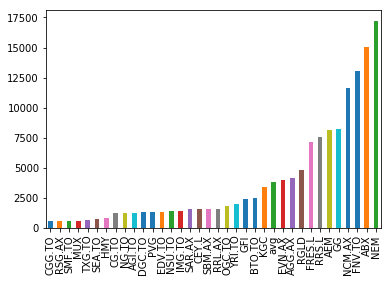

In [72]:
marketCaps = tickerData.loc["marketCap", :]
filtered = marketCaps[marketCaps > 500]
topCapData = tickerData.loc[:, filtered.index.values]

def tryConvertToFloat(x):
    try:
        return float(x)
    except(ValueError, TypeError):
        return x

for column in topCapData:
    topCapData[column] = topCapData[column].map(tryConvertToFloat)

means = {}
for index, row in topCapData.iterrows():
    try:
        mean = topCapData.loc[index, :].mean()
        means[index] = mean
    except(TypeError):
        continue
s = pd.Series(means)       
topCapData["avg"] = s
print(topCapData)
mc = topCapData.loc["marketCap", :].sort_values()
mc.plot.bar()
plt.show()